In [1]:
import pandas as pd


In [2]:
df = pd.read_csv("./데이터/glass.csv")

In [3]:
df.head()


,RI,Na,Mg,Al,Si,K,Ca,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,1


In [4]:
# 특징과 라벨 분리
X = df.drop(['Type'], axis = 1)
Y = df['Type']

In [5]:
# 학습 데이터와 평가 데이터 분리
from sklearn.model_selection import train_test_split
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y)
Train_X.shape

(160, 8)

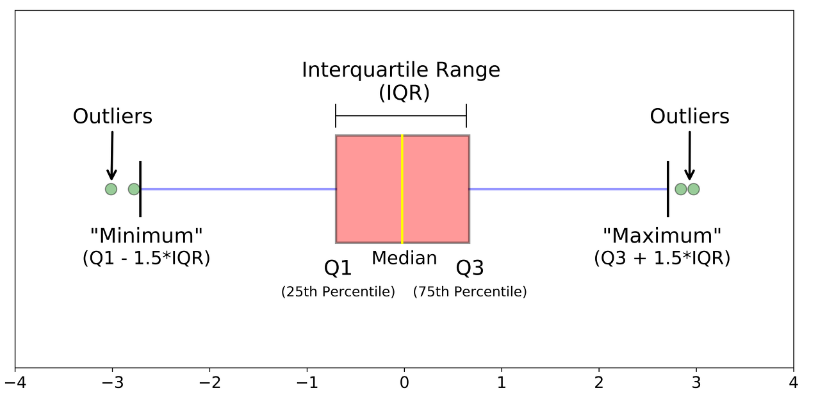

In [6]:
import numpy as np

In [22]:
def IQR_rule(val_list) : # 한 특성에 포함된 값(열벡터)
    q1 = np.quantile(val_list, 0.25)
    q3 = np.quantile(val_list, 0.75)
    IQR = q3-q1
    not_outlier_condition = (q3 + 1.5 * IQR > val_list) & (q1 - 1.5 * IQR < val_list)
    return not_outlier_condition
        

In [24]:
IQR_rule(Train_X['RI'])

137    True
1      True
192    True
26     True
203    True
       ... 
9      True
183    True
64     True
90     True
154    True
Name: RI, Length: 160, dtype: bool

In [25]:
conditions = Train_X.apply(IQR_rule)
conditions

,RI,Na,Mg,Al,Si,K,Ca,Fe
137,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True
192,True,True,True,False,True,True,True,True
26,True,True,True,True,True,True,True,True
203,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...
9,True,True,True,True,True,True,True,True
183,True,True,True,True,True,True,False,True
64,True,True,True,True,True,True,True,True
90,True,True,True,True,True,True,True,True


In [33]:
total_cond = conditions.sum(axis=1) == len(Train_X.columns)
# 하나라도 IQR 규칙을 위반하는 요소를 갖는 레코드인 경우 false 값을 갖게 됨

In [29]:
Train_X.shape

(160, 8)

In [34]:
Train_X = Train_X.loc[total_cond]

In [35]:
Train_X.shape

(111, 8)